# Linear Regression Code Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## Khởi tạo data
Data được lấy từ Machine Learning cơ bản

In [27]:
# xoay T để tạo thành 1 cột 13 hàng, phù hợp với việc tính toán và chia dữ liệu
# sklearn yêu cầu (n_sam, n_f)

X = np.array([[147, 150, 153, 158, 165, 165, 168, 170, 173, 175, 178, 180, 182]]).T
y = np.array([[ 49, 50, 51,  54, 59, 59, 60, 62, 63, 64, 66, 67, 68]]).T
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Kiểm tra một số giả định
Đối với hồi quy tuyến tính, ta nên thực hiện kiểm tra một số giả định trên dữ liệu trước khi bắt đầu xây dựng mô hình. 
-  Giả định dữ liệu tuyến tính: có thể thử plot ra xem nó có thành đường thẳng hay không (cho trường hợp đơn biến)
- Giả định các biến x độc lập: 

## Plot dữ liệu

Bộ data trên đã được chỉnh sửa để cố tình tạo ra nhiễu

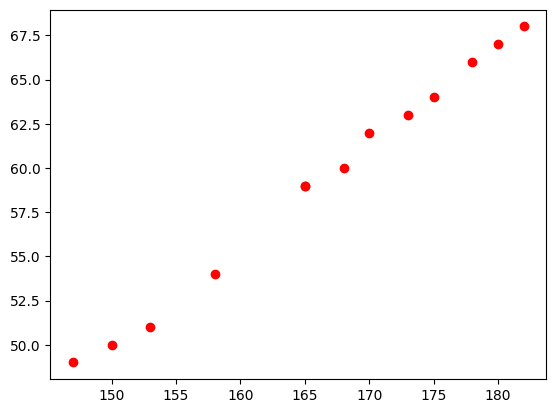

In [28]:
plt.scatter(X, y, color='red', label='data')

Dữ liệu có xu hướng tạo thành một đường thẳng nên phù hợp với sử dụng hồi quy tuyến tính (trong thop này là đơn biến). Ta có thể nói dữ liệu có tính tuyến tính. 

## Fit mô hình mà dự đoán

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Đánh giá hiệu suất mô hình 
Sử dụng 2 metric MSE và R2-Square

In [30]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2: ", r2)

MSE: 0.3537758860782321
R2:  0.9942939373213189


In [31]:
print(f"Coef: {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")

Coef: 0.5810754481033763
Intercept: -37.37473947478114


In [32]:
coef = model.coef_[0][0]
intercept = model.intercept_[0]

### Vẽ biểu đồ và xem thử kết quả

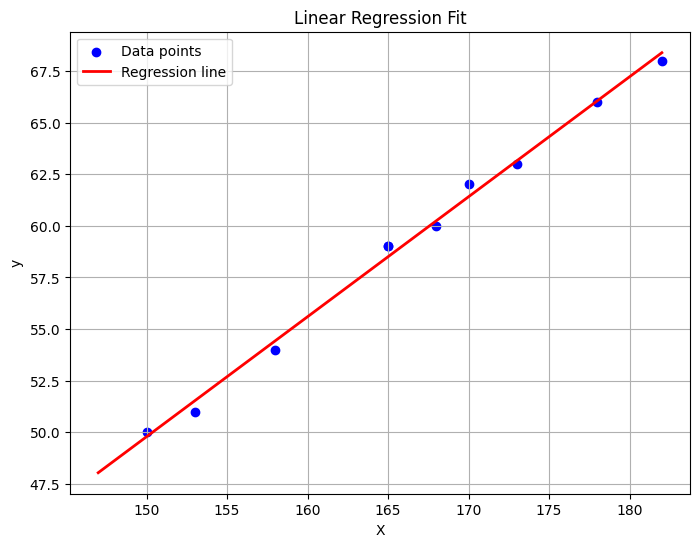

In [33]:
x_line = np.linspace(np.min(X), np.max(X), 100)
y_line = coef * x_line + intercept

# Vẽ đồ thị
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Data points')
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression Fit On Traning Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

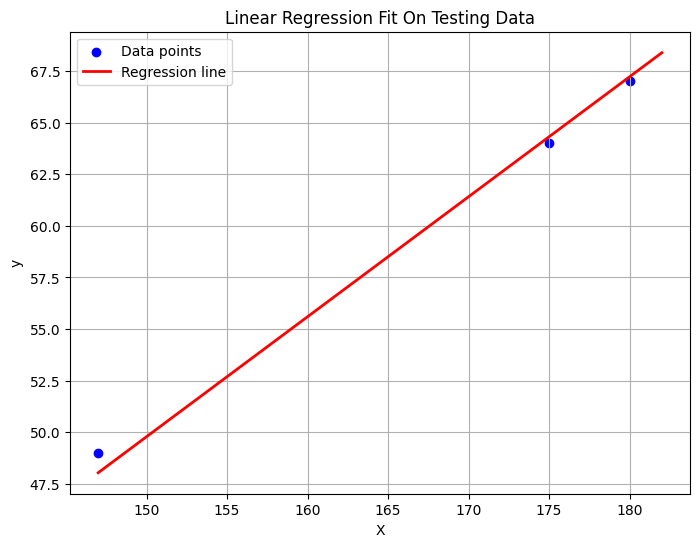

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Data points')
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression Fit On Testing Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Ta thấy đường hồi quy đã fit với cả train và cả test, đây có thể là một đường hồi quy tốt.

### Trường hợp dữ liệu có nhiễu
Điểm yếu lớn của hồi quy tuyến tính là nó nhạy cảm với nhiễu, vì vậy nếu như có các nhiễu lớn trong dữ liệu, đường hồi quy sẽ bị thay đổi đi rất nhiều

In [48]:
X_noise = np.array([[147, 300, 153, 158, 165, 165, 168, 170, 173, 175, 178, 180, 400]]).T
y_noise = np.array([[ 49, 100, 51,  54, 59, 59, 60, 62, 63, 64, 66, 67, 90]]).T
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, test_size=0.2, random_state=42)

In [49]:
model_2 = LinearRegression()
model_2.fit(X_train_noise, y_train_noise)
y_pred_noise = model_2.predict(X_test)

In [50]:
coef_2 = model_2.coef_[0][0]
intercept_2 = model_2.intercept_[0]

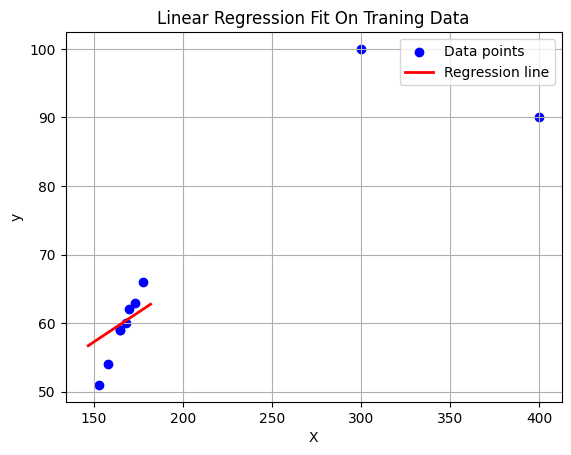

In [51]:
x_line = np.linspace(np.min(X), np.max(X), 100)
y_line = coef_2 * x_line + intercept_2

# Vẽ đồ thị
plt.scatter(X_train_noise, y_train_noise, color='blue', label='Data points')
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression Fit On Traning Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()




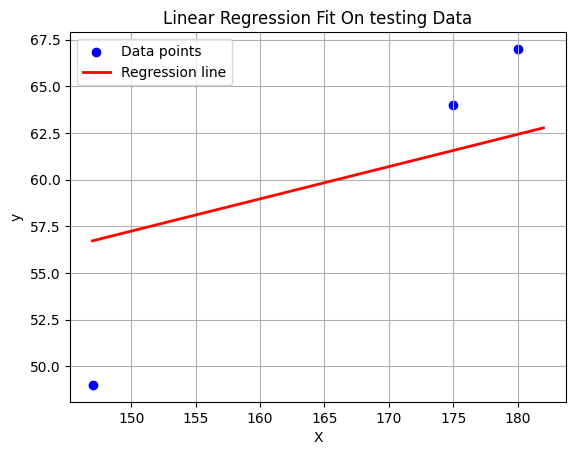

In [52]:
plt.scatter(X_test_noise, y_test_noise, color='blue', label='Data points')
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression Fit On testing Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Ta thấy đường dự đoán hoàn toàn sai lệch. 